In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**IMAGE CAPTIONING  ** 

Import the required libraries 
* transformers
* PIL
* mathplotlib
* requests
* IO

In [1]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [2]:
# Load the processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [3]:
def generate_caption(image_path):
    # Check if the image path is a URL
    if image_path.startswith("http"):
        # Load image from URL
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content)).convert("RGB")  # Convert to RGB if needed
    else:
        # Load image from file system
        image = Image.open(image_path).convert("RGB")  # Convert to RGB if needed

    # Preprocess the image
    inputs = processor(images=image, return_tensors="pt")

    # Generate captions
    outputs = model.generate(**inputs)

    # Decode the generated captions
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption, image

In [6]:
image_path = input("Enter image URL or file path: ")
caption, image = generate_caption(image_path)

Enter image URL or file path:  https://tensorflow.org/images/surf.jpg


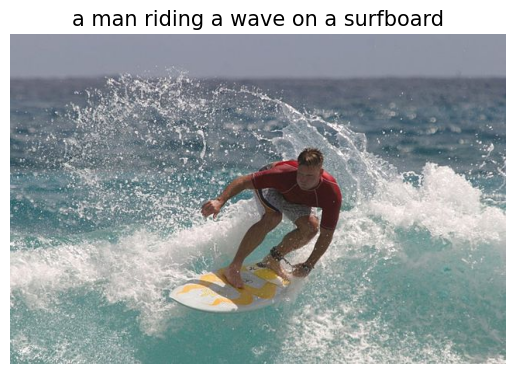

In [7]:
# Display the image with the caption
plt.imshow(image)
plt.title(caption, fontsize=15)
plt.axis('off')
plt.show()